In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x = mnist.data

In [6]:
y = mnist.target

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
x = x.values
y = y.values

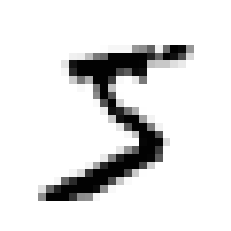

Number: 5


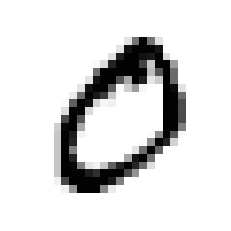

Number: 0


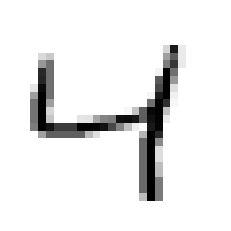

Number: 4


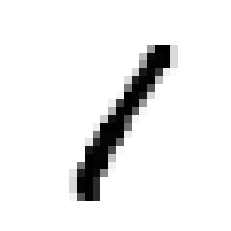

Number: 1


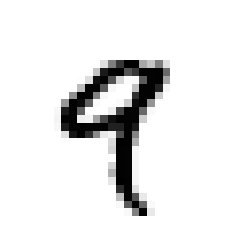

Number: 9


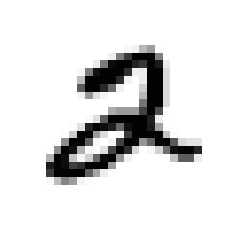

Number: 2


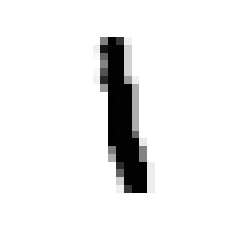

Number: 1


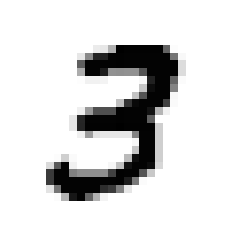

Number: 3


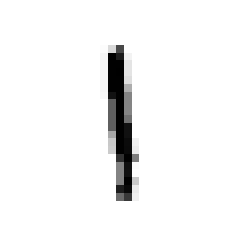

Number: 1


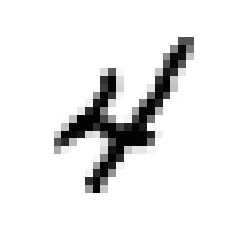

Number: 4


In [10]:
for i in range(0,10):
    some_digit = x[i]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = "Greys", interpolation="nearest")
    plt.axis("off")
    plt.show()
    print("Number: " + y[i])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train, y_train)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score = model.score(x_test,y_test)

In [19]:
print(r2_score*100,'%')

92.06428571428572 %


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1312,    0,    2,    3,    3,   13,   13,    2,   10,    3],
       [   1, 1536,    9,    6,    1,    6,    2,    2,   16,    4],
       [   8,   18, 1249,   25,   13,    3,   14,   21,   42,    8],
       [   5,    1,   35, 1273,    3,   61,    0,   10,   27,   10],
       [   3,    6,    5,    2, 1298,    3,    4,    6,    8,   37],
       [  12,   12,   12,   52,   17, 1079,   20,    5,   39,   12],
       [  10,    1,   20,    0,   13,   12, 1366,    0,    6,    1],
       [   4,    4,   23,    4,   10,    2,    1, 1378,    6,   50],
       [   6,   26,   18,   26,   11,   38,   10,    7, 1160,   21],
       [   7,    9,    1,   14,   38,   11,    0,   33,   13, 1238]],
      dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

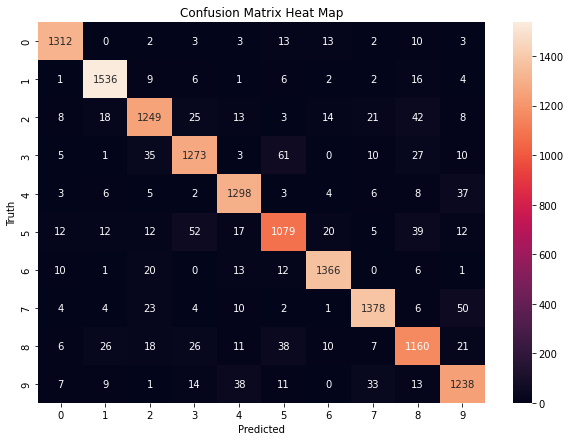

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Heat Map")

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(n_estimators = 3, criterion = "entropy")

In [25]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [26]:
y_pred = model.predict(x_test)

In [27]:
r2_score = model.score(x_test,y_test)

In [28]:
print(r2_score*100,'%')

88.9 %


In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1318,    0,   11,    4,    3,    5,    7,    1,   10,    2],
       [   4, 1543,   14,    6,    2,    2,    2,    3,    6,    1],
       [  37,   21, 1269,   11,   12,    5,    4,   24,   17,    1],
       [  21,   32,   65, 1205,    1,   56,    4,    9,   26,    6],
       [  12,   12,   21,    7, 1256,    5,    6,    9,    2,   42],
       [  43,   20,   24,   89,   21, 1024,   13,    2,   15,    9],
       [  32,   13,   22,   13,   16,   22, 1304,    0,    6,    1],
       [   8,   12,   46,   21,   31,   12,    2, 1320,    5,   25],
       [  30,   30,   57,   62,   27,   26,    8,    6, 1063,   14],
       [  17,   10,   27,   31,   82,   19,    6,   20,    8, 1144]],
      dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

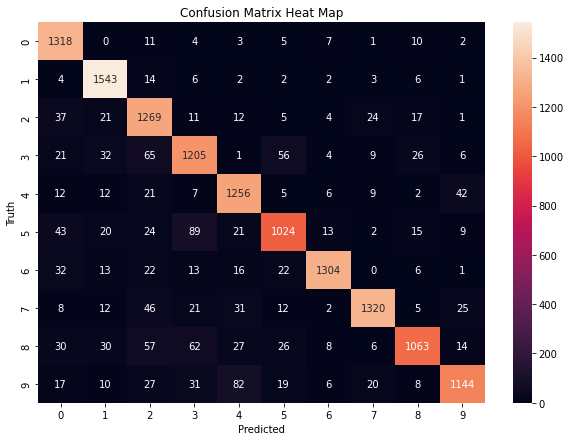

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Heat Map")

### KNeighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model = KNeighborsClassifier(n_neighbors=5)

In [33]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = model.predict(x_test)

In [35]:
r2_score = model.score(x_test,y_test)

In [36]:
print(r2_score*100,'%')

97.14285714285714 %


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1354,    1,    1,    0,    0,    0,    2,    1,    1,    1],
       [   1, 1569,    6,    0,    1,    0,    2,    3,    0,    1],
       [   9,   11, 1349,    4,    1,    0,    0,   21,    4,    2],
       [   1,    2,   11, 1384,    0,   13,    2,    4,    5,    3],
       [   0,   13,    0,    0, 1328,    0,    2,    1,    0,   28],
       [   5,    2,    3,   23,    3, 1208,    9,    1,    3,    3],
       [   5,    2,    1,    0,    2,    4, 1415,    0,    0,    0],
       [   0,   11,    6,    1,    4,    0,    0, 1448,    0,   12],
       [   2,   19,    3,   16,    6,   19,   11,    7, 1226,   14],
       [   5,    3,    2,    9,    9,    4,    1,   11,    1, 1319]],
      dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heat Map')

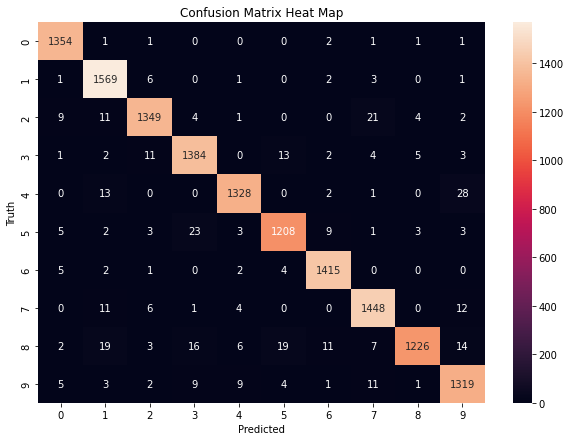

In [38]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Heat Map")

#### KNeighbors Classifier shows highest accuracy of 97%, followed by Random Forest Classifier and Linear Regression Classifier.